<h4> Finding Cutoff Threshold For Probability Loss Function </h4>
- here, the objective is to find the best decision threshold for choosing between 2 different stimuli (s1 and s2) where we incur a loss function stating that it is twice as bad to incorrectly choose s2 than it is to choose s1

In [12]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
from scipy import stats
from scipy.stats import norm

Define Parameters:

In [22]:
mu_1 = 5
sigma_1 = 0.5

mu_2 = 7
sigma_2 = 1

priors = [0.5, 0.5] # prior probability of each stimulus value (s1, s2)

Generate Distributions:

In [23]:
x = np.arange(3,10, 0.01)
r_s1 = norm.pdf(x, mu_1, sigma_1)
r_s2 = norm.pdf(x, mu_2, sigma_2)
r_both = priors[0]*r_s1 + priors[1]*r_s2

Graph Probability Densities:

Text(0.5,1,'Response probability densities')

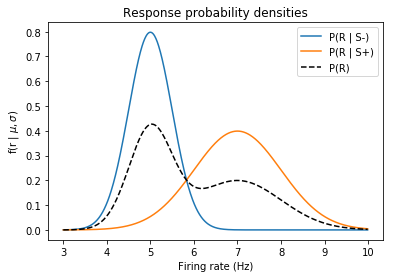

In [20]:
plt.plot(x, r_s1)
plt.plot(x, r_s2)
plt.plot(x, r_both, '--k')
plt.axvline(x=cutoff, c='r')

plt.xlabel('Firing rate (Hz)')
plt.ylabel('f(r | $\mu, \sigma$)')
plt.legend(['P(R | S-)','P(R | S+)','P(R)'])
plt.title('Response probability densities')

Computing a likelihood ratio to find the value of the stimulus (z) for which the likelihood of being correct is the largest:

For equal priors, we should choose s1 (or s+ in the pic below) whenever:


For unequal priors, we should choose s1 (or s+ in the pic below) whenever:


and we should also use the log likelihood ratio as our calculation for the distributions utilize exponents

In [67]:
lr = np.log(r_s2/r_s1) # take the log likelihood ratio for all possible firing rates
lr_0 = np.argmax(lr >= 0) # get the first value that is >0
    # we use 0 here instead of 1 bc of the log likelihood
    # if we didn't use the log, this would switch to lr >= 1

Text(0.5,1,'Response probability densities')

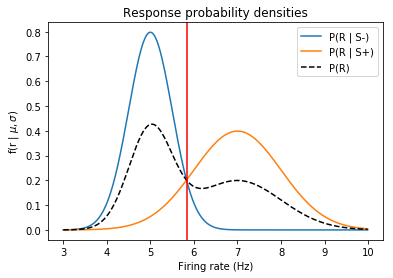

In [69]:
plt.plot(x, r_s1)
plt.plot(x, r_s2)
plt.plot(x, r_both, '--k')
plt.axvline(x[lr_0], c='r')

plt.xlabel('Firing rate (Hz)')
plt.ylabel('f(r | $\mu, \sigma$)')
plt.legend(['P(R | S-)','P(R | S+)','P(R)'])
plt.title('Response probability densities')

<h4> Creating a visual of the 2 different probability distributions and the cutoff metric: </h4>

In [6]:
def graph_pdf(mu1, sigma1, mu2, sigma2, cutoff):
    x1 = np.linspace(mu1 - 3*sigma1, mu1+3*sigma1, 100)
    x2 = np.linspace(mu2 - 3*sigma2, mu2+3*sigma2, 100)
    plt.plot(x1, scipy.stats.norm.pdf(x1, mu1, sigma1))
    plt.plot(x2, scipy.stats.norm.pdf(x2, mu2, sigma2))
    plt.axvline(x=cutoff, c='r')
    plt.show()

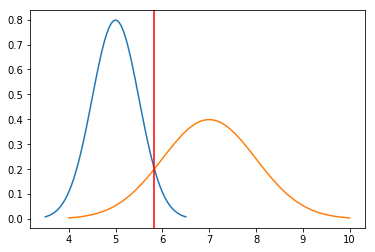

In [7]:
# stimulus s1: mu=5, std. dev. = 0.5
# stimulus s2: mu=7, std.dev. = 1
# cutoff for choosing stimulus s2 over s1 = 5.978
graph_pdf(5, 0.5, 7, 1, 5.83)

<h4> Calculating the Probability Density Function: </h4>

In [8]:
def compute_pdf(mu1, sigma1, x1):
    out = (1/(math.sqrt(2*math.pi*(sigma1**2))))*(math.exp(-(((x1-mu1)**2)/(2*sigma1**2))))
    return out

# could also use: scipy.stats.norm.pdf(x, mu, sigma) but that's no fun

- We want to choose the cutoff where the pdf for s2 is twice as big as the pdf for s1

In [9]:
# this is where the two graphs intersect:
compute_pdf(7,1,5.83)/compute_pdf(5, 0.5, 5.83)

1.0002028400093081

In [10]:
# this is what we're looking for:
compute_pdf(7,1,5.978)/compute_pdf(5, 0.5, 5.978)

2.0088829462271613

<h4> Calculating the integral to find the area under the curve: </h4>

In [11]:
mean = 0
var = 1
curr_sample = np.linspace(-10,10,10000)
prob = np.sum( 1/(np.sqrt(2*np.pi*var))*np.exp( -( ((curr_sample - mean)**2)/(2*var) ) ) * (curr_sample[1]-curr_sample[0]) )
print(prob)

0.9999999999996152


In [ ]:
stats.